In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load annotation file

In [3]:
df = pd.read_csv("E:\MSc Data Science\Third term\Research Project\general\charade\CharadesEgo\CharadesEgo_v1_test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   object 
 1   subject         1693 non-null   object 
 2   scene           1693 non-null   object 
 3   quality         1691 non-null   float64
 4   relevance       1685 non-null   float64
 5   verified        1693 non-null   object 
 6   script          1693 non-null   object 
 7   objects         1692 non-null   object 
 8   descriptions    2 non-null      object 
 9   actions         1691 non-null   object 
 10  length          1693 non-null   float64
 11  egocentric      1693 non-null   object 
 12  charades_video  1289 non-null   object 
dtypes: float64(3), object(10)
memory usage: 172.1+ KB


In [4]:
df['actions'].value_counts().sort_values(ascending=False)

actions
c015 0.00 32.12;c107 0.00 32.12;c106 0.00 32.12;c109 0.00 32.12;c110 0.00 32.12;c016 0.00 32.12                                                                                                                                                                                                                                                                                                   2
c097 0.00 17.58;c005 0.00 17.58;c105 0.00 17.58                                                                                                                                                                                                                                                                                                                                                   2
c104 2.40 8.80;c021 8.30 15.70;c151 10.50 17.10;c135 13.80 25.79;c020 6.90 23.40;c063 5.50 10.50;c061 6.30 23.10;c133 0.00 4.10;c156 7.30 14.30;c088 6.90 17.10;c146 6.00 17.00;c134 9.80 16.60                         

We should expect each value of `actions` are in two rows (one for egocentric view and one for exocentric view) 

# Transform the annotation file

In [5]:
rows = []
for _, r in df.iterrows():
  vid = r['id']
  actions = r['actions']
  if (isinstance(actions, str)):
    for trip in actions.split(';'):
      cls, st, en = trip.split()
      rows.append({'video': vid, 'class': cls, 'start': float(st), 'end': float(en)})

all_actions = pd.DataFrame(rows)

In [6]:
all_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18726 entries, 0 to 18725
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   video   18726 non-null  object 
 1   class   18726 non-null  object 
 2   start   18726 non-null  float64
 3   end     18726 non-null  float64
dtypes: float64(2), object(2)
memory usage: 585.3+ KB


In [7]:
all_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18726 entries, 0 to 18725
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   video   18726 non-null  object 
 1   class   18726 non-null  object 
 2   start   18726 non-null  float64
 3   end     18726 non-null  float64
dtypes: float64(2), object(2)
memory usage: 585.3+ KB


In [8]:
all_actions.head()

,video,class,start,end
0,W1XD0EGO,c115,0.0,21.7
1,W1XD0EGO,c116,13.1,22.5
2,W1XD0EGO,c123,0.0,22.5
3,W1XD0EGO,c139,21.4,22.5
4,W1XD0EGO,c077,11.6,22.5


### Sample some actions

In [11]:
# Sample some actions
filtered_actions = ["c047", "c046", "c048", "c049", "c050", "c051"]

In [15]:
# Step 1: Get all videos where every class is in filtered_actions
valid_videos = (
    all_actions
    .groupby('video')['class']
    .apply(lambda x: set(filtered_actions).issubset(set(x)))
)

# Step 2: Filter the DataFrame
filtered = all_actions[
    all_actions['video'].isin(valid_videos[valid_videos].index)
]

print(valid_videos[valid_videos].index)
filtered.head()

Index(['TVEHJ'], dtype='object', name='video')


,video,class,start,end
5510,TVEHJ,c046,16.2,22.2
5511,TVEHJ,c059,0.0,24.9
5512,TVEHJ,c050,0.0,3.7
5513,TVEHJ,c154,20.9,26.4
5514,TVEHJ,c049,18.5,24.9


### Visualize actions intervals

In [9]:
def plot_actions_intervals(annots_df, vid):
    # Get rows associated with vid
    video = annots_df[annots_df["video"] == vid]

    # Calculate durations
    # durations = [end - start for start, end in zip(video["start"], video["end"])]
    durations = video["end"] - video["start"]

    # Create a horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot each action as a horizontal bar
    for i, (cls, start, duration) in enumerate(
        zip(video["class"], video["start"], durations)
    ):
        ax.barh(i, duration, left=start, height=0.6, label=cls)
        ax.text(
            start + duration / 2,
            i,
            cls,
            va="center",
            ha="center",
            color="white",
            fontsize=10,
        )

    # Formatting
    ax.set_xlabel("Time (s)")
    ax.set_yticks(range(len(video["class"])))
    ax.set_yticklabels(video["class"])
    ax.set_title(f"Action Class Intervals for Video {vid}")
    ax.grid(True, axis="x", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

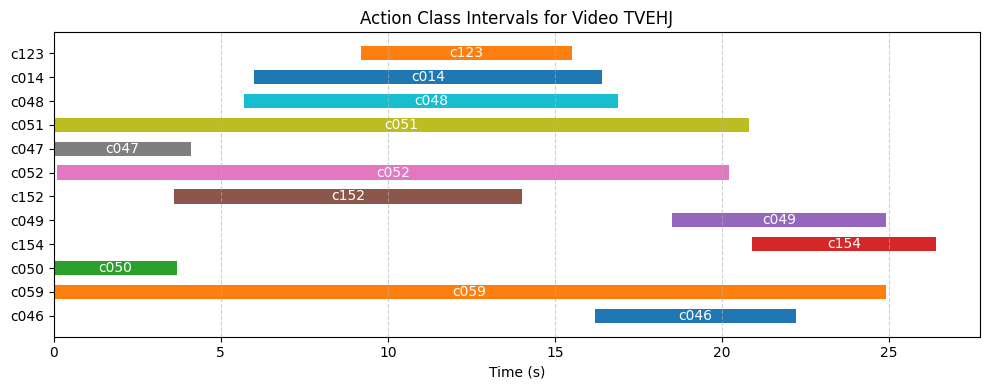

In [16]:
plot_actions_intervals(all_actions, 'TVEHJ')